In [5]:
import tqdm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck as pdk

sns.set(style="whitegrid")
sns.set_context("paper")

In [6]:
import os
import sys

if './src' not in sys.path:
    sys.path.append('./src')

In [7]:
from config import config

os.environ["MAPBOX_API_KEY"] = config['mapbox']['token']

In [8]:
data = pd.read_csv('output/results/model_v0.2_full.csv', index_col=0)
# data.loc[:, 'f1'] = data.loc[:, 'f1_test'].apply(lambda x: float(x.strip('%')) / 100)
# data.loc[:, 'roc_auc'] = data.loc[:, 'roc_auc_test'].apply(lambda x: float(x.strip('%')) / 100)

records = []

for i in range(len(data)):
    record = data.iloc[i]
    temp = record[['year','month','radius','aperture_size','incident_interval','time_step','select']].to_dict()
    for col in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']:
        temp_col = {'idx':i, 'scorer': col, 'score': record[col]}
        temp_col.update(temp)
        records.append(temp_col)

data = pd.DataFrame(records)

data.head()

idx          scorer     score  year  month  radius  aperture_size  \
0    0   test_accuracy  0.725475  2019    NaN     300              7   
1    0  test_precision  0.279025  2019    NaN     300              7   
2    0     test_recall  0.684866  2019    NaN     300              7   
3    0         test_f1  0.396422  2019    NaN     300              7   
4    0    test_roc_auc  0.745243  2019    NaN     300              7   

   incident_interval  time_step select  
0                 25        5.0   None  
1                 25        5.0   None  
2                 25        5.0   None  
3                 25        5.0   None  
4                 25        5.0   None

In [9]:
len(data)

810

In [10]:
data[data.idx==65]

idx          scorer     score  year  month  radius  aperture_size  \
325   65   test_accuracy  0.849011  2019    NaN    1000              7   
326   65  test_precision  0.108582  2019    NaN    1000              7   
327   65     test_recall  0.623810  2019    NaN    1000              7   
328   65         test_f1  0.184570  2019    NaN    1000              7   
329   65    test_roc_auc  0.801210  2019    NaN    1000              7   

     incident_interval  time_step select  
325                  5        5.0   None  
326                  5        5.0   None  
327                  5        5.0   None  
328                  5        5.0   None  
329                  5        5.0   None

In [7]:
data[data.scorer == 'test_f1'].sort_values('score')

idx   scorer     score  year  month  radius  aperture_size  \
773  154  test_f1  0.072923  2019    NaN    1500              8   
713  142  test_f1  0.073245  2019    NaN    1500              8   
538  107  test_f1  0.075653  2019    NaN    1500              8   
508  101  test_f1  0.125062  2019    NaN    1500              8   
438   87  test_f1  0.129505  2019    NaN    1000              8   
..   ...      ...       ...   ...    ...     ...            ...   
598  119  test_f1  0.459873  2019    NaN      50              7   
288   57  test_f1  0.465478  2019    NaN      50              6   
128   25  test_f1  0.465969  2019    NaN     100              6   
243   48  test_f1  0.475097  2019    NaN      50              6   
73    14  test_f1  0.477321  2019    NaN     100              6   

     incident_interval  time_step select  
773                  5        5.0   None  
713                  5        2.5   None  
538                  5        1.0   None  
508                 15        5.0   None  
438                  5        2.5   None  
..                 ...        ...    ...  
598                 25        1.0   None  
288                 25        2.5   None  
128                 25        2.5   None  
243                 25        1.0   None  
73                  25        1.0   None  

[162 rows x 10 columns]

In [19]:

data = data.assign(scorer=data['scorer'].apply(lambda x: ' '.join(x.split('_')[1:])))

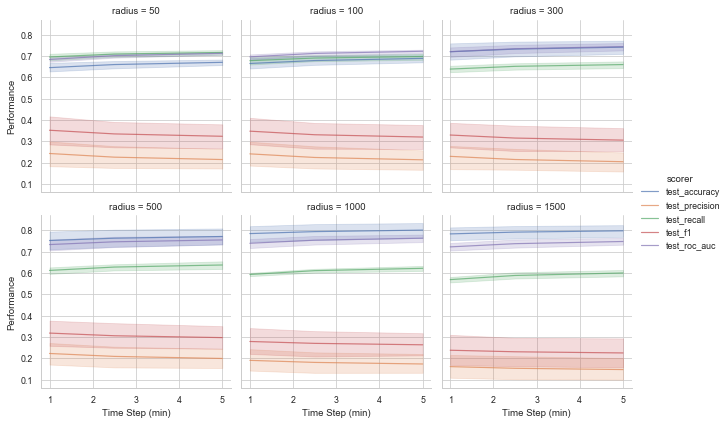

In [18]:
g = sns.FacetGrid(data, col='radius', hue='scorer', col_wrap=3)

g.map(sns.lineplot, 'time_step', 'score', alpha=.7)

g.set_axis_labels("Time Step (min)", "Performance")

g.add_legend()

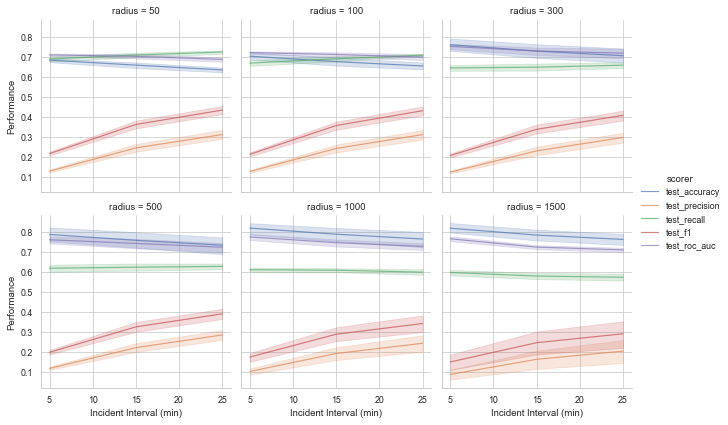

In [17]:
g = sns.FacetGrid(data, col="radius", hue='scorer', col_wrap=3)

g.map(sns.lineplot, "incident_interval", "score", alpha=.7)

g.set_axis_labels("Incident Interval (min)", "Performance")

g.add_legend()

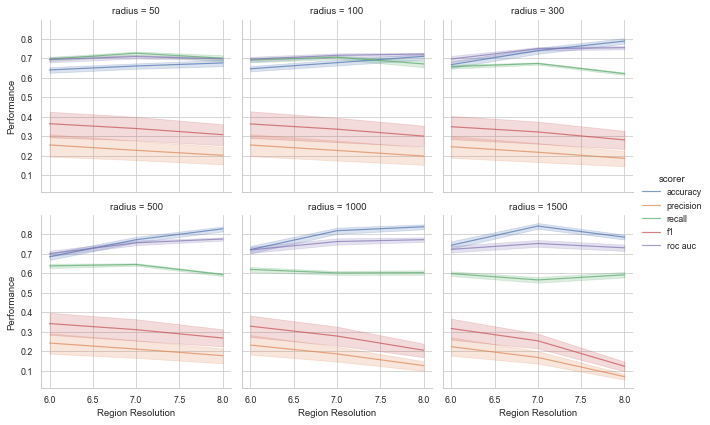

In [20]:
g = sns.FacetGrid(data, col="radius", hue='scorer', col_wrap=3)

g.map(sns.lineplot, "aperture_size", "score", alpha=.7)

g.set_axis_labels("Region Resolution", "Performance")

g.add_legend()

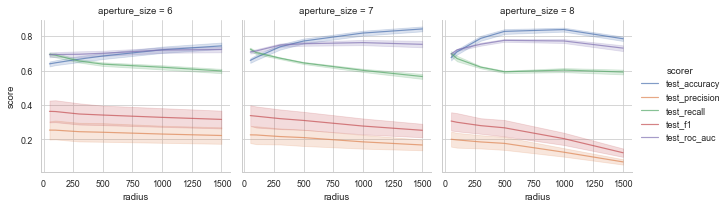

In [43]:
g = sns.FacetGrid(data, col="aperture_size", hue='scorer')

g.map(sns.lineplot, "radius", "score", alpha=.7)

g.add_legend()

## Prior Analyis

In [27]:
import sys
import h3
import numpy as np

sys.path.append('./src')

from dataset import load_incidents

In [28]:
df_freq

NameError: name 'df_freq' is not defined

In [29]:
aperture_size = 7

df_freq = load_incidents(aperture_size)

df_freq = df_freq[df_freq.time < '2019-10-01']

df_freq.head()

segment_id       lat       lng     timestamp  count                time  \
12          75  36.33824 -86.91432  1.566950e+09      1 2019-08-27 23:56:00   
19          76  36.32822 -86.89224  1.567493e+09      1 2019-09-03 06:36:00   
29          78  36.32453 -86.86942  1.567221e+09      1 2019-08-31 03:05:00   
34          78  36.32506 -86.87614  1.564770e+09      1 2019-08-02 18:14:00   
42          80  36.32392 -86.86774  1.567175e+09      1 2019-08-30 14:25:00   

             region  
12  87264dc74ffffff  
19  87264dc66ffffff  
29  87264dc66ffffff  
34  87264dc66ffffff  
42  87264dc64ffffff

In [30]:
df_freq

segment_id       lat       lng     timestamp  count                time  \
12            75  36.33824 -86.91432  1.566950e+09      1 2019-08-27 23:56:00   
19            76  36.32822 -86.89224  1.567493e+09      1 2019-09-03 06:36:00   
29            78  36.32453 -86.86942  1.567221e+09      1 2019-08-31 03:05:00   
34            78  36.32506 -86.87614  1.564770e+09      1 2019-08-02 18:14:00   
42            80  36.32392 -86.86774  1.567175e+09      1 2019-08-30 14:25:00   
...          ...       ...       ...           ...    ...                 ...   
6931        2922  36.12451 -86.73647  1.568497e+09      1 2019-09-14 21:39:00   
6949        2923  36.12543 -86.73342  1.568993e+09      1 2019-09-20 15:25:00   
6952        2923  36.12561 -86.73283  1.566935e+09      1 2019-08-27 19:50:00   
6954        2923  36.12581 -86.73234  1.566565e+09      1 2019-08-23 12:50:00   
6957        2924  36.12588 -86.73216  1.569583e+09      1 2019-09-27 11:10:00   

               region  
12    87264dc74ffffff  
19    87264dc66ffffff  
29    87264dc66ffffff  
34    87264dc66ffffff  
42    87264dc64ffffff  
...               ...  
6931  87264d10cffffff  
6949  87264d10cffffff  
6952  87264d10cffffff  
6954  87264d10cffffff  
6957  87264d10cffffff  

[1559 rows x 7 columns]

In [46]:
def region_prior(region, hour):
    resolution = h3.h3_get_resolution(region)
    incident_df = load_incidents(resolution, df_freq)
    # change to historical data values
    # use labels_prv to prevent overfitting
    # return 1 / len(np.unique(labels.region))
    lower = len(incident_df) + len(np.unique(incident_df.region)) * 24
    prior = (np.sum((incident_df.region == region) & (incident_df.time.dt.hour == hour)) + 1) / lower
    # prior = np.sum(incident_df['region'] == region[2:]) / len(incident_df)
    return prior

In [47]:
min(df_freq.time), max(df_freq.time)

(Timestamp('2019-08-01 05:00:00'), Timestamp('2019-09-30 22:57:00'))

In [48]:
records = []

for region in tqdm.tqdm(np.unique(df_freq.region)):
    for hour in range(24):
        records.append({
           'region': region, 'hour': (hour - 5), 'prior':region_prior(region, hour)
        })

priors_df = pd.DataFrame(records)

100%|██████████| 94/94 [01:56<00:00,  1.24s/it]


In [49]:
priors_df.head()

region  hour     prior
0  87264d020ffffff    -5  0.000262
1  87264d020ffffff    -4  0.000524
2  87264d020ffffff    -3  0.000262
3  87264d020ffffff    -2  0.000262
4  87264d020ffffff    -1  0.000262

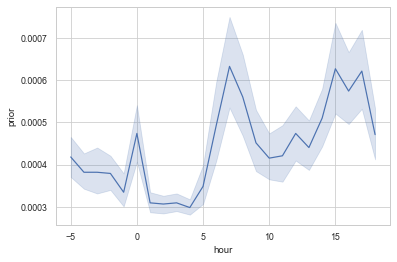

In [50]:
ax = sns.lineplot(x="hour", y="prior", data=priors_df)

In [51]:
df = priors_df[priors_df.hour < 8].groupby('region')[['prior']].mean().reset_index()

df.loc[:, 'prior'] = (df['prior'] - min(df['prior'])) / (max(df['prior']) - min(df['prior']))

# Define a layer to display on a map
layer = pdk.Layer(
    "H3HexagonLayer",
    df,
    pickable=True,
    stroked=True,
    filled=True,
    extruded=False,
    get_hexagon="region",
    get_fill_color="[(1-prior) * 255, 0, 0]",
    get_line_color=[255, 255, 255],
    line_width_min_pixels=2,
)

# Set the viewport location
view_state = pdk.ViewState(latitude=36.1627, longitude=-86.7816, zoom=11, bearing=0, pitch=0)


# Render
r = pdk.Deck(map_style="mapbox://styles/mapbox/light-v9", layers=[layer], initial_view_state=view_state, tooltip={"text": "Density: {prior}"})

r.show()

DeckGLWidget(json_input='{"initialViewState": {"bearing": 0, "latitude": 36.1627, "longitude": -86.7816, "pitc…

In [52]:
df = priors_df[priors_df.hour >= 8].groupby('region')[['prior']].mean().reset_index()

df.loc[:, 'prior'] = (df['prior'] - min(df['prior'])) / (max(df['prior']) - min(df['prior']))

# Define a layer to display on a map
layer = pdk.Layer(
    "H3HexagonLayer",
    df,
    pickable=True,
    stroked=True,
    filled=True,
    extruded=False,
    get_hexagon="region",
    get_fill_color="[(1-prior) * 255, 0, 0]",
    get_line_color=[255, 255, 255],
    line_width_min_pixels=2,
)

# Set the viewport location
view_state = pdk.ViewState(latitude=36.1627, longitude=-86.7816, zoom=11, bearing=0, pitch=0)


# Render
r = pdk.Deck(map_style="mapbox://styles/mapbox/light-v9", layers=[layer], initial_view_state=view_state, tooltip={"text": "Density: {prior}"})

r.show()

DeckGLWidget(json_input='{"initialViewState": {"bearing": 0, "latitude": 36.1627, "longitude": -86.7816, "pitc…

In [74]:
data = pd.read_pickle('output/2019_12_100_6_LogisticRegression_pred.pkl')

In [80]:
aperture_size = 6

In [159]:
waze_df = pd.read_pickle(f'output/waze/2019_10_100_6_features.pkl')
incident_df = load_incidents(aperture_size)

In [181]:
incident_time = []
report_time = []
for idx, row in tqdm.tqdm(list(data.iterrows())):
    incidents = incident_df[(incident_df.time >= row.start_time) & (incident_df.time < row.end_time) & (incident_df.region == row.region[2:])]
    incident_time.append(incidents.time)
    waze_reports = waze_df[(waze_df.time >= row.start_time) & (waze_df.time < row.end_time) & waze_df.loc[:, row.region] > 0]
    report_time.append(waze_reports)

100%|██████████| 36959/36959 [02:44<00:00, 224.85it/s]


In [182]:
data.loc[:, 'incident_time'] = [x.iloc[0] if len(x) > 0 else None for x in incident_time]

In [184]:
data_temp

start_time            end_time                time  \
incident_id                                                               
0           2019-09-30 23:53:00 2019-10-01 00:18:00 2019-09-30 23:53:00   
82          2019-10-28 11:34:11 2019-10-28 11:59:11 2019-10-28 11:50:00   
105         2019-11-04 23:40:30 2019-11-05 00:05:30 2019-11-04 23:40:00   
113         2019-11-07 00:12:22 2019-11-07 00:37:22 2019-11-07 00:12:00   
116         2019-11-07 15:01:41 2019-11-07 15:26:41 2019-11-07 15:01:00   
...                         ...                 ...                 ...   
6151        2019-10-30 19:10:24 2019-10-30 19:35:24 2019-10-30 19:10:00   
6153        2019-10-31 14:06:22 2019-10-31 14:31:22 2019-10-31 14:06:00   
6208        2019-11-01 12:08:23 2019-11-01 12:33:23 2019-11-01 12:08:00   
6214        2019-11-15 00:06:59 2019-11-15 00:31:59 2019-11-15 00:06:00   
6219        2019-11-26 12:33:39 2019-11-26 12:58:39 2019-11-26 12:33:00   

                        region  posterior_proba  avg_reliability  count  \
incident_id                                                               
0            r_86264d027ffffff              1.0         7.000000      3   
82           r_86264d027ffffff              1.0         8.000000     31   
105          r_86264d027ffffff              1.0         7.750000     36   
113          r_86264d027ffffff              1.0         8.142857      7   
116          r_86264d027ffffff              1.0         7.400000     20   
...                        ...              ...              ...    ...   
6151         r_86264d187ffffff              1.0         7.137931     29   
6153         r_86264d187ffffff              1.0         6.971429     35   
6208         r_86264d56fffffff              1.0         7.700000     40   
6214         r_86264d56fffffff              1.0         7.810811     37   
6219         r_86264d56fffffff              1.0         7.764706     17   

             rand_porba    priors  y_pred  y_true       incident_time  
incident_id                                                            
0              0.283030  0.000421    True    True 2019-10-01 00:05:00  
82             0.296884  0.000842    True    True 2019-10-28 11:35:00  
105            0.546271  0.000421    True    True 2019-11-04 23:41:00  
113            0.919286  0.001263    True    True 2019-11-07 00:14:00  
116            0.058670  0.000842    True    True 2019-11-07 15:07:00  
...                 ...       ...     ...     ...                 ...  
6151           0.223461  0.000421    True    True 2019-10-30 19:14:00  
6153           0.086163  0.000421    True    True 2019-10-31 14:11:00  
6208           0.380063  0.000842    True    True 2019-11-01 12:23:00  
6214           0.580787  0.000421    True    True 2019-11-15 00:08:00  
6219           0.718782  0.000842    True    True 2019-11-26 12:34:00  

[655 rows x 12 columns]

In [185]:
report_time[0]

time  reliability  r_86264d027ffffff  r_86264d117ffffff  \
8725 2019-10-01 00:15:49            5                1.0                0.0   
8814 2019-10-01 00:15:49            6                1.0                0.0   
8838 2019-09-30 23:53:00           10                1.0                0.0   

      r_86264d897ffffff  r_86264d8dfffffff  r_86264d10fffffff  \
8725                0.0                0.0                0.0   
8814                0.0                0.0                0.0   
8838                0.0                0.0                0.0   

      r_86264d107ffffff  r_86264d12fffffff  r_86264d157ffffff  ...  \
8725                0.0                0.0                0.0  ...   
8814                0.0                0.0                0.0  ...   
8838                0.0                0.0                0.0  ...   

      r_86264d8a7ffffff  r_86264d887ffffff  r_86264d8c7ffffff  \
8725                0.0                0.0                0.0   
8814                0.0                0.0                0.0   
8838                0.0                0.0                0.0   

      r_86264d14fffffff  r_86264d89fffffff  r_86264dc77ffffff  \
8725                0.0                0.0                0.0   
8814                0.0                0.0                0.0   
8838                0.0                0.0                0.0   

      r_86264dd5fffffff  r_86264d1afffffff  r_86264d187ffffff  \
8725                0.0                0.0                0.0   
8814                0.0                0.0                0.0   
8838                0.0                0.0                0.0   

      r_86264d56fffffff  
8725                0.0  
8814                0.0  
8838                0.0  

[3 rows x 27 columns]

In [196]:
f'Time of Accident Recorded @ 2019-10-01 00:05:00'

'Time of Accident Recorded @ 2019-10-01 00:05:00'

In [201]:
data_temp = data[data.y_pred & data.y_true]  # there is an actual accident and it is predicted

data_temp = data_temp.groupby('incident_id').first()

print((data_temp.incident_time - data_temp.time).astype('timedelta64[m]'))

t = np.average((data_temp.incident_time - data_temp.time).astype('timedelta64[m]'))

f'On average the algorithm predicts the accident {t} minutes before an official report is filed in TDOT database.'

incident_id
0       12.0
82     -15.0
105      1.0
113      2.0
116      6.0
        ... 
6151     4.0
6153     5.0
6208    15.0
6214     2.0
6219     1.0
Length: 655, dtype: float64


'On average the algorithm predicts the accident 5.925190839694657 minutes before an official report is filed in TDOT database.'

In [ ]:
12 minsA